<a href="https://colab.research.google.com/github/MizanMustakim/soil_heavy_metal/blob/main/Soil_heavy_metal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster

**Build necessary functions**

In [3]:
def data_process(cmax, data):
    freq = []
    atte = []
    for i in range(1, cmax+1):
        freq.append((i * 6.25)/10**3)   # THz 

    # for k in range(30):
    #     atte.append([])
    # for i in range(cmax):
        # a = np.mean(data[i])        # unit cm^(-1)
        # atte.append((a*4.343)/10)    # dB/mm

    for k in range(30):
        atte.append([])
        for i in range(cmax):
            a = data.iloc[k,i]        # unit cm^(-1)
            atte[k].append((a*4.343)/10)    # dB/mm

    # atte = np.mean(atte, axis=0)
    d = pd.DataFrame(columns=["Frequency", "Attenuation"])
    f = []
    a = []
    for i in range(len(atte)):
        for j in range(cmax):
            a.append(atte[i][j])
            f.append(freq[j])

    d.Frequency = f
    d.Attenuation = a

    return d

In [4]:
def data_cleaning(d):
    q3 = d["Attenuation"].describe().loc["75%"] # 3rd Quartile
    q1 = d["Attenuation"].describe().loc["25%"] # 1st Quartile
    iqr = abs(q1 - q3) # Inter Quartile range
    max = q3 + 1.5 * iqr # Max range of data after removing outliers
    min = q1 - 1.5 * iqr # Min range of data after removing outliers
    # print("Minimum range: ",min)
    # print("Maximum range: ",max)
    idx = []
    for i in range(d.shape[0]):
        if d.iloc[i][1] < min:
            idx.append(i)
        elif d.iloc[i][1] > max:
            idx.append(i)
        else:
            pass

    d = d.drop(idx)
    # print(d.describe())

    group_df = d.groupby("Frequency")
    mean_df = group_df.mean()
    mean_df = mean_df.reset_index()

    return mean_df

In [5]:
def plotting(freq, atte):
    pH = input("Enter the pH value: ")
    quantity = input("Enter the quantity of Pb (mg/Kg): ")

    fig = plt.figure(figsize=(10,7))
    # for i in atte:
    #     plt.plot(freq, i)
    # plt.plot(freq, atte, "r-")
    # plt.xlim(0.2,1.7)
    # plt.ylim(0,7)
    plt.xlabel("Frequency (THz)", fontsize=16)
    plt.ylabel("Attenuation (dB/mm)", fontsize=16)
    plt.errorbar(freq, atte, yerr=0.4, ecolor="paleturquoise", fmt="g-")
    plt.title("Attenuation for Pb of {} mg/Kg for pH value of {}".format(quantity,pH), fontsize=16)
    plt.grid()
    plt.savefig("{}_{}.png".format(quantity, pH))
    plt.show()
    

**Attenuation analysis on Pb of 200mg/Kg**

In [6]:
data_200 = pd.read_csv("/content/drive/MyDrive/Soil_work/Data200mg.txt", sep="\t", header=None)
data_200.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
0,0.315000,0.107539,3.159077,0.560615,1.006153,1.185218,0.695782,0.253232,0.238156,-0.037720,0.007615,0.222403,0.717454,0.580689,0.555798,0.461863,0.453977,0.411748,0.132421,0.087878,0.281589,0.207314,0.223259,0.333821,0.407161,0.410273,0.470673,0.447162,0.366283,0.483544,0.555439,0.533378,0.552538,0.609874,0.632752,0.615099,0.558661,0.513169,0.487588,0.460562,...,-1.474760,-1.378373,-0.819084,-0.272264,0.144859,0.081455,-0.447416,-0.821843,-0.814335,-0.874886,-1.355205,-1.731472,-1.486954,-1.196078,-1.194776,-1.352972,-1.452739,-1.506413,-1.141704,-1.183257,-1.579306,-1.840654,-2.107876,-2.354690,-2.501489,-2.567956,-2.545523,-2.644868,-2.587859,-2.604910,-2.671030,-2.632228,-3.000000,-1.967005,-0.981786,-1.023152,-1.009614,5.155924,-1.349538,-1.315000
1,0.105411,1.495915,4.535419,2.011923,2.431427,2.564600,2.089954,1.663673,1.665412,1.402734,1.482217,1.718803,2.178715,2.027731,2.002517,1.918187,1.908096,1.860136,1.580829,1.517985,1.710056,1.609178,1.602118,1.714311,1.804025,1.822338,1.890324,1.880418,1.811679,1.930204,2.003204,1.968154,1.969515,2.032854,2.059120,2.035417,1.976130,1.933233,1.902767,1.869668,...,-2.429283,-2.439518,-2.411709,-2.420443,-2.423927,-2.306197,-2.168796,-2.056112,-1.878499,-1.801352,-1.757023,-1.792155,-1.784376,-1.804541,-1.799574,-1.885214,-2.175048,-2.480822,-2.617747,-2.675604,-2.627827,-2.463272,-2.166943,-2.176150,-2.086966,-2.207928,-2.131573,-1.927037,-1.522451,-1.027029,-0.723068,-0.709476,-0.813766,-1.205927,-1.380306,-1.529604,-0.386100,-1.351596,-0.804093,0.105411
2,0.494102,-0.092484,3.647134,0.446753,0.860371,1.118018,0.580948,0.068133,0.094220,-0.208609,-0.194028,-0.015647,0.455510,0.310855,0.303082,0.246439,0.269594,0.261622,-0.005510,-0.093241,0.053028,-0.079305,-0.113202,-0.006700,0.100674,0.165534,0.291862,0.328030,0.273201,0.363565,0.389811,0.295159,0.238064,0.273652,0.304058,0.323600,0.327346,0.339289,0.351530,0.334621,...,-2.278786,-2.213441,-2.090566,-2.136017,-2.266040,-2.370042,-2.619941,-2.926103,-2.943450,-2.885288,-2.834663,-2.634485,-2.427286,-2.337694,-2.235173,-2.241937,-2.465757,-2.674448,-2.665518,-2.693366,-2.860882,-2.745038,-2.372270,-2.024580,-1.873938,-1.933674,-2.040745,-2.164404,-2.417611,-2.694601,-2.832819,-2.634637,-2.381893,-2.274950,-2.308455,-2.347576,-2.311958,-2.030339,-2.083721,-1.494102
3,0.922786,-0.506824,2.896138,0.029099,0.457061,0.674921,0.165041,-0.315843,-0.335865,-0.598272,-0.575177,-0.380390,0.107686,-0.017848,-0.024225,-0.082479,-0.059804,-0.082705,-0.379189,-0.417259,-0.263855,-0.373352,-0.385194,-0.261834,-0.155735,-0.094920,0.021795,0.037232,-0.038116,0.072865,0.122624,0.055504,0.028105,0.085293,0.129063,0.149070,0.135055,0.123082,0.117901,0.090791,...,-1.897139,-1.841958,-1.781409,-1.849580,-2.037975,-2.270859,-2.528478,-2.734220,-2.815386,-2.790804,-2.713367,-2.573650,-2.433711,-2.382192,-2.368916,-2.398437,-2.474505,-2.559455,-2.616069,-2.643491,-2.655080,-2.682691,-2.752806,-2.837178,-2.936176,-3.000000,-2.929698,-2.773069,-2.610373,-2.378367,-2.115128,-1.986196,-1.986454,-2.009476,-2.111940,-2.336633,-2.211672,-2.112710,-2.313748,-1.922786
4,0.888896,-0.443038,3.573821,-0.055321,0.414537,0.649589,0.063764,-0.487266,-0.427345,-0.717953,-0.655426,-0.419468,0.056791,-0.087572,-0.110583,-0.188436,-0.190133,-0.231916,-0.504664,-0.555808,-0.361598,-0.472381,-0.471555,-0.350422,-0.252228,-0.211545,-0.124494,-0.132001,-0.201649,-0.106273,-0.076157,-0.156678,-0.172310,-0.113081,-0.073181,-0.060027,-0.078434,-0.090213,-0.095154,-0.121450,...,-2.535987,-2.460709,-2.360306,-2.326261,-2.347753,-2.420873,-2.534883,-2.619003,-2.648637,-2.651616,-2.580180,-2.431356,-2.391738,-2.487458,-2.582621,-2.719038,-2.827789,-2.769254,-2.593203,-2.437855,-2.289160,-2

In [7]:
ph_5_5 = data_200[:30]  # data for ph value 5.5
ph_7 = data_200[30:60]  # data for ph value 7
ph_8_5 = data_200[60:90]  # data for ph value 8.5

In [8]:
cmax = int(data_200.size/90)
cmax

1023

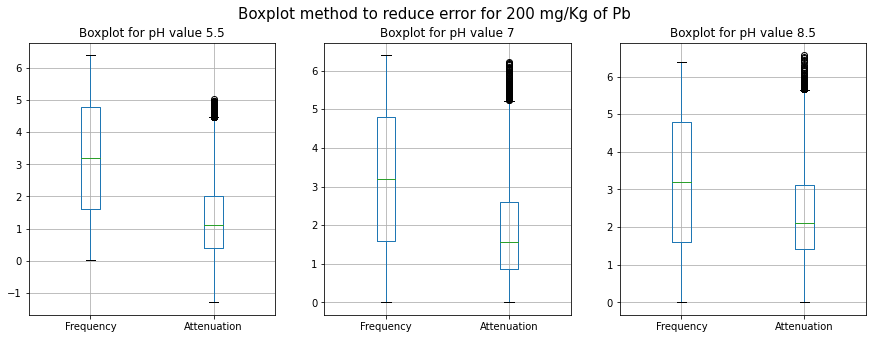

In [9]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig.suptitle("Boxplot method to reduce error for 200 mg/Kg of Pb", fontsize=15)

data_5_5 = data_process(cmax, ph_5_5)
data_5_5.plot.box(ax=axes.flatten()[0], title = "Boxplot for pH value 5.5", grid=True)

data_7 = data_process(cmax, ph_7)
data_7.plot.box(ax=axes.flatten()[1], title = "Boxplot for pH value 7", grid=True)

data_8_5 = data_process(cmax, ph_8_5)
data_8_5.plot.box(ax=axes.flatten()[2], title = "Boxplot for pH value 8.5", grid=True)

plt.show()

In [10]:
data_5_5 = data_cleaning(data_5_5)
data_7 = data_cleaning(data_7)
data_8_5 = data_cleaning(data_8_5)

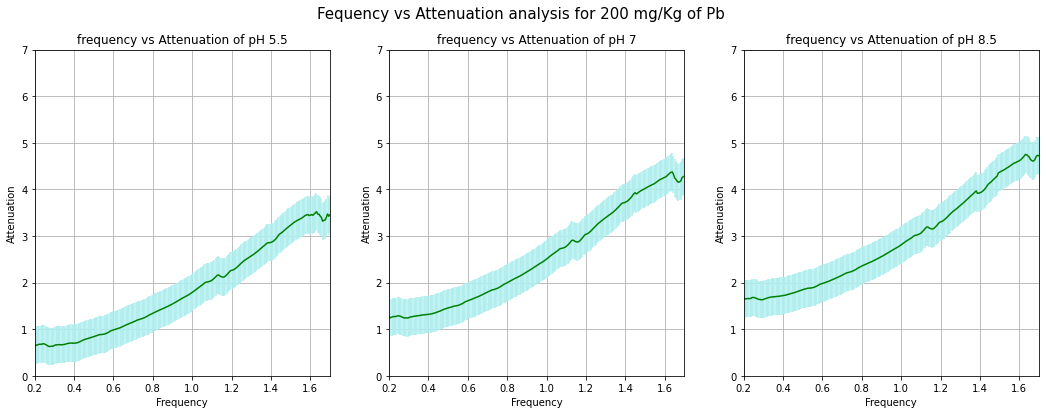

In [11]:
fig = plt.figure(figsize=(18,6))

fig.suptitle("Fequency vs Attenuation analysis for 200 mg/Kg of Pb", fontsize=15)

plt.subplot(1,3,1)
plt.xlim(0.2,1.7)
plt.ylim(0,7)
plt.errorbar(data_5_5.Frequency, data_5_5.Attenuation, yerr=0.4, ecolor="paleturquoise", fmt="g-")
plt.grid(True)
plt.xlabel("Frequency")
plt.ylabel("Attenuation")
plt.title("frequency vs Attenuation of pH 5.5")

plt.subplot(1,3,2)
plt.xlim(0.2,1.7)
plt.ylim(0,7)
plt.errorbar(data_7.Frequency, data_7.Attenuation, yerr=0.4, ecolor="paleturquoise", fmt="g-")
plt.grid(True)
plt.xlabel("Frequency")
plt.ylabel("Attenuation")
plt.title("frequency vs Attenuation of pH 7")

plt.subplot(1,3,3)
plt.xlim(0.2,1.7)
plt.ylim(0,7)
plt.errorbar(data_8_5.Frequency, data_8_5.Attenuation, yerr=0.4, ecolor="paleturquoise", fmt="g-")
plt.grid(True)
plt.xlabel("Frequency")
plt.ylabel("Attenuation")
plt.title("frequency vs Attenuation of pH 8.5")

plt.show()

**Attenuation analysis on Pb of 600mg/Kg**

In [12]:
data_600 = pd.read_csv("/content/drive/MyDrive/Soil_work/Data600mg.txt", sep="\t", header=None)
data_600.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
0,1.729098,3.050971,7.440843,3.574716,4.012589,4.309252,3.729684,3.149464,3.218460,2.931934,2.955618,3.139137,3.581678,3.443978,3.441210,3.405940,3.444633,3.444191,3.182111,3.115767,3.250707,3.093130,3.013889,3.095724,3.190877,3.263132,3.406427,3.474220,3.458436,3.579875,3.624041,3.526331,3.443708,3.468723,3.480835,3.482876,3.484653,3.506312,3.533658,3.534032,...,2.721727,2.799984,2.873974,3.245290,3.711004,3.983683,4.024695,3.924035,3.790092,3.555221,3.346782,3.176405,3.034767,3.016794,3.394692,3.746728,3.851086,3.802663,4.109319,4.434117,4.692318,4.664317,4.395041,3.933708,3.597145,3.196981,2.761098,2.496367,2.684462,2.838523,2.777900,2.526206,2.502354,2.687238,2.680528,2.490607,4.006479,3.552352,1.498225,1.729098
1,1.780159,3.123137,6.742116,3.701094,4.126073,4.343198,3.829062,3.332838,3.349220,3.050583,3.064548,3.228981,3.661523,3.513348,3.502676,3.474981,3.524388,3.542415,3.311769,3.235081,3.366719,3.203572,3.120250,3.186773,3.270831,3.348099,3.493739,3.567389,3.563917,3.682309,3.720730,3.619100,3.529880,3.530281,3.525632,3.522126,3.521228,3.544570,3.585283,3.604399,...,3.208371,3.147739,3.137878,3.091395,3.049654,3.085709,3.054804,2.949761,2.924222,2.997797,2.991536,2.910384,2.833323,2.756101,2.681308,2.638274,2.642689,2.651364,2.615583,2.514624,2.409260,2.327665,2.249835,2.177275,2.155018,2.189936,2.298786,2.375014,2.328151,2.138855,1.910448,1.688471,1.538792,1.494621,1.513339,1.828245,2.284224,1.965202,1.552181,1.780159
2,2.579674,3.929110,8.320545,4.364981,4.818416,5.119502,4.519441,3.923209,3.974449,3.718719,3.754196,3.952643,4.419729,4.288773,4.272754,4.213861,4.226487,4.191589,3.896290,3.869903,4.017107,3.894109,3.857932,3.942514,4.021399,4.066595,4.161925,4.183144,4.137376,4.260576,4.331308,4.304457,4.305155,4.363687,4.415304,4.445016,4.432690,4.423801,4.428618,4.409455,...,1.711110,1.752359,1.896095,2.020144,2.064749,2.102611,2.133872,2.177365,2.169120,2.114898,2.104026,2.137235,2.108127,2.116623,2.150590,2.102396,2.079680,2.389444,2.829067,3.118360,3.104093,3.227932,3.290081,3.200973,2.802094,1.961865,1.912484,2.238036,2.376817,2.249411,2.246618,2.536592,2.671249,2.627935,2.435583,2.498933,2.413368,2.385803,2.550239,2.579674
3,1.898573,3.268079,7.797585,3.743090,4.182596,4.488039,3.875260,3.264899,3.330820,3.058443,3.092233,3.281016,3.746571,3.622566,3.619983,3.567226,3.589249,3.571040,3.279604,3.228757,3.376998,3.253790,3.219019,3.319811,3.422604,3.483634,3.596371,3.630476,3.583581,3.700310,3.758457,3.705707,3.681416,3.729772,3.763008,3.771600,3.745350,3.729933,3.727472,3.698220,...,3.699545,3.679231,3.605406,3.478387,3.339876,3.206538,3.082142,3.049397,3.118671,3.153891,3.103802,3.065522,3.051126,3.026215,3.001189,2.941268,2.844397,2.771017,2.715483,2.673178,2.745262,2.942029,3.090236,3.097619,2.999868,2.823222,2.629716,2.506540,2.467840,2.442241,2.405167,2.320446,2.198533,2.111607,2.055959,2.004549,2.326055,2.353561,2.115067,1.898573


In [13]:
ph_5_5_600 = data_600[:30]  # data for ph value 5.5
ph_7_600 = data_600[30:60]  # data for ph value 7
ph_8_5_600 = data_600[60:90]  # data for ph value 8.5

In [14]:
cmax = int(data_600.size/90)

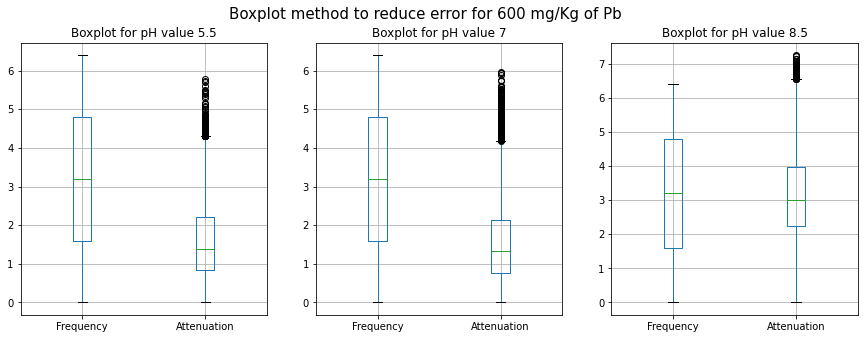

In [15]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig.suptitle("Boxplot method to reduce error for 600 mg/Kg of Pb", fontsize=15)

data_5_5 = data_process(cmax, ph_5_5_600)
data_5_5.plot.box(ax=axes.flatten()[0], title = "Boxplot for pH value 5.5", grid=True)

data_7 = data_process(cmax, ph_7_600)
data_7.plot.box(ax=axes.flatten()[1], title = "Boxplot for pH value 7", grid=True)

data_8_5 = data_process(cmax, ph_8_5_600)
data_8_5.plot.box(ax=axes.flatten()[2], title = "Boxplot for pH value 8.5", grid=True)

plt.show()

In [16]:
data_5_5 = data_cleaning(data_5_5)
data_7 = data_cleaning(data_7)
data_8_5 = data_cleaning(data_8_5)

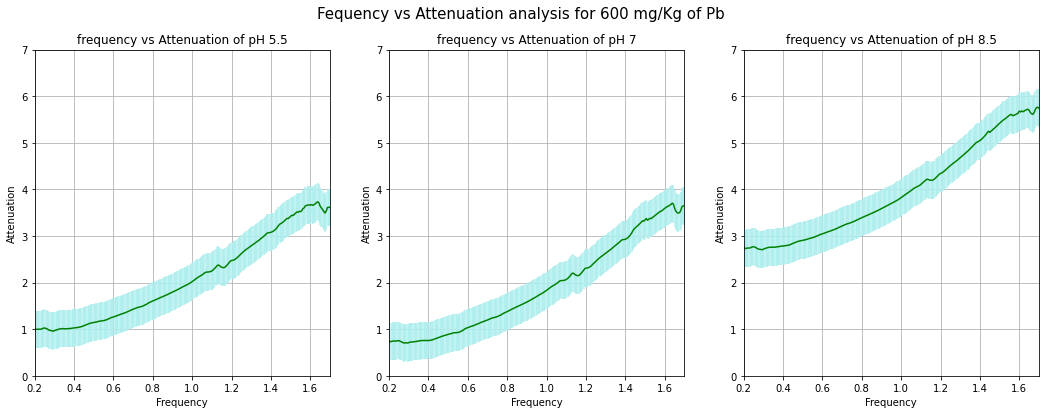

In [17]:
fig = plt.figure(figsize=(18,6))

fig.suptitle("Fequency vs Attenuation analysis for 600 mg/Kg of Pb", fontsize=15)

plt.subplot(1,3,1)
plt.xlim(0.2,1.7)
plt.ylim(0,7)
plt.errorbar(data_5_5.Frequency, data_5_5.Attenuation, yerr=0.4, ecolor="paleturquoise", fmt="g-")
plt.grid(True)
plt.xlabel("Frequency")
plt.ylabel("Attenuation")
plt.title("frequency vs Attenuation of pH 5.5")

plt.subplot(1,3,2)
plt.xlim(0.2,1.7)
plt.ylim(0,7)
plt.errorbar(data_7.Frequency, data_7.Attenuation, yerr=0.4, ecolor="paleturquoise", fmt="g-")
plt.grid(True)
plt.xlabel("Frequency")
plt.ylabel("Attenuation")
plt.title("frequency vs Attenuation of pH 7")

plt.subplot(1,3,3)
plt.xlim(0.2,1.7)
plt.ylim(0,7)
plt.errorbar(data_8_5.Frequency, data_8_5.Attenuation, yerr=0.4, ecolor="paleturquoise", fmt="g-")
plt.grid(True)
plt.xlabel("Frequency")
plt.ylabel("Attenuation")
plt.title("frequency vs Attenuation of pH 8.5")

plt.show()

**Attenuation analysis on Pb of 1000mg/Kg**

In [18]:
data_1000 = pd.read_csv("/content/drive/MyDrive/Soil_work/Data1000mg.txt", sep="\t", header=None)
data_1000.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
0,5.449349,5.896267,9.845185,5.582103,5.992021,6.121698,5.505183,4.897623,4.986941,4.644696,4.661451,4.892212,5.347107,5.238969,5.224462,5.140124,5.144995,5.116766,4.868217,4.809051,5.016228,4.950024,4.984178,5.097464,5.162699,5.166276,5.236408,5.208930,5.134090,5.241546,5.285380,5.226676,5.235428,5.281626,5.302131,5.305044,5.276115,5.239003,5.213893,5.178428,...,6.379970,6.343067,6.492126,6.756607,6.962399,7.075754,7.174889,7.104047,6.875655,6.694307,6.615609,6.492389,6.538431,6.654083,6.687157,6.646366,6.548657,6.424390,6.375243,6.297464,6.124202,5.902840,5.799467,5.728646,5.594668,5.467498,5.359725,5.275676,5.235006,5.211442,5.241954,5.240312,5.195701,5.146896,5.130059,5.014678,4.755596,5.015514,5.328432,5.449349
1,4.146183,5.085579,8.604976,5.249372,5.654768,5.878775,5.357305,4.849635,4.896353,4.578785,4.556279,4.731009,5.166207,5.051097,5.039859,4.991451,5.022775,5.025120,4.781850,4.674967,4.796682,4.679104,4.639736,4.715629,4.799340,4.876729,5.004608,5.044442,5.014715,5.119163,5.147114,5.054487,4.997508,5.001920,5.007186,5.018013,5.008557,5.015673,5.046629,5.048128,...,4.105134,3.975845,4.072840,4.203474,4.207677,4.064558,3.850612,3.772460,3.869183,3.938227,3.928803,4.020560,4.194024,4.312355,4.336532,4.336388,4.392488,4.440824,4.366775,4.228502,4.156502,4.169444,4.133852,4.002954,3.873318,3.816232,3.810726,3.729742,3.585320,3.562754,3.674216,3.737241,3.755083,3.812565,3.909784,3.930598,3.925994,4.156391,4.171787,4.146183
2,3.847602,4.765388,7.532174,5.090960,5.438745,5.642519,5.211755,4.800946,4.790671,4.437800,4.397844,4.522555,4.949600,4.816905,4.787330,4.740542,4.791248,4.824316,4.621456,4.510195,4.660086,4.534774,4.474454,4.523219,4.566443,4.612509,4.728224,4.769728,4.758810,4.880017,4.921115,4.831363,4.769200,4.758885,4.733662,4.712881,4.689830,4.693585,4.734609,4.765192,...,4.673565,4.658741,4.614183,4.572999,4.559377,4.456067,4.303916,4.304457,4.360707,4.325779,4.274520,4.319980,4.371190,4.385314,4.377239,4.336670,4.285514,4.313494,4.337445,4.258893,4.148627,4.079031,4.014322,3.948695,3.926178,3.935996,3.940985,3.924453,3.886997,3.861225,3.874985,3.924347,4.030736,4.186997,4.324753,4.485459,4.641245,4.433031,4.026817,3.847602
3,5.033293,5.484804,8.643314,5.273825,5.643336,5.740366,5.214819,4.713609,4.753649,4.374398,4.361624,4.530653,4.943285,4.802723,4.774430,4.706015,4.745880,4.790899,4.563377,4.404256,4.553653,4.427923,4.308255,4.308679,4.345654,4.382202,4.502114,4.575979,4.581837,4.719145,4.793061,4.731213,4.642469,4.622740,4.600095,4.575277,4.545307,4.557256,4.615513,4.662844,...,3.915347,3.981369,4.067593,4.115315,4.114691,4.152633,4.260079,4.393536,4.546657,4.700786,4.818973,4.900126,4.924975,4.846880,4.698034,4.581687,4.558324,4.618112,4.684208,4.723651,4.821544,4.963605,5.043871,5.034135,5.045424,4.974837,4.820522,4.794136,4.841894,4.830870,4.837845,4.955878,5.019440,5.029040,5.068683,5.530250,4.919761,4.653271,4.886782,5.033293


In [19]:
ph_5_5_1000 = data_1000[:30]  # data for ph value 5.5
ph_7_1000 = data_1000[30:60]  # data for ph value 7
ph_8_5_1000 = data_1000[60:90]  # data for ph value 8.5

In [20]:
cmax = int(data_1000.size/90)

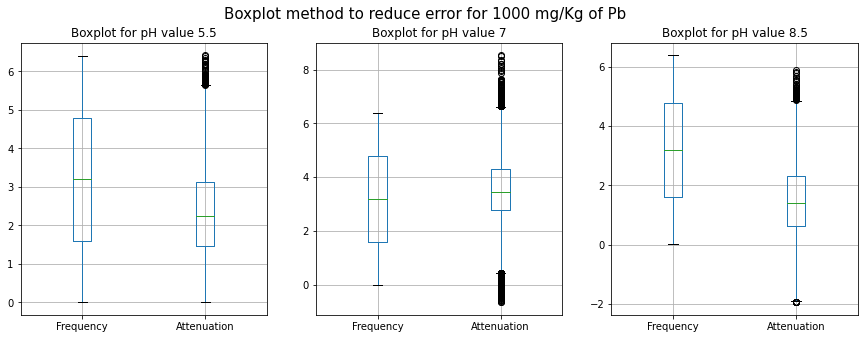

In [21]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

fig.suptitle("Boxplot method to reduce error for 1000 mg/Kg of Pb", fontsize=15)

data_5_5 = data_process(cmax, ph_5_5_1000)
data_5_5.plot.box(ax=axes.flatten()[0], title = "Boxplot for pH value 5.5", grid=True)

data_7 = data_process(cmax, ph_7_1000)
data_7.plot.box(ax=axes.flatten()[1], title = "Boxplot for pH value 7", grid=True)

data_8_5 = data_process(cmax, ph_8_5_1000)
data_8_5.plot.box(ax=axes.flatten()[2], title = "Boxplot for pH value 8.5", grid=True)

plt.show()

In [22]:
data_5_5 = data_cleaning(data_5_5)
data_7 = data_cleaning(data_7)
data_8_5 = data_cleaning(data_8_5)

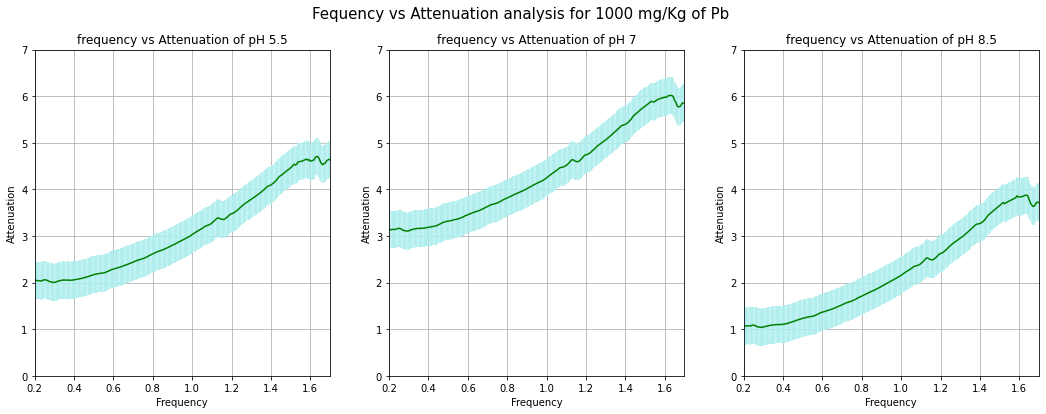

In [23]:
fig = plt.figure(figsize=(18,6))

fig.suptitle("Fequency vs Attenuation analysis for 1000 mg/Kg of Pb", fontsize=15)

plt.subplot(1,3,1)
plt.xlim(0.2,1.7)
plt.ylim(0,7)
plt.errorbar(data_5_5.Frequency, data_5_5.Attenuation, yerr=0.4, ecolor="paleturquoise", fmt="g-")
plt.grid(True)
plt.xlabel("Frequency")
plt.ylabel("Attenuation")
plt.title("frequency vs Attenuation of pH 5.5")

plt.subplot(1,3,2)
plt.xlim(0.2,1.7)
plt.ylim(0,7)
plt.errorbar(data_7.Frequency, data_7.Attenuation, yerr=0.4, ecolor="paleturquoise", fmt="g-")
plt.grid(True)
plt.xlabel("Frequency")
plt.ylabel("Attenuation")
plt.title("frequency vs Attenuation of pH 7")

plt.subplot(1,3,3)
plt.xlim(0.2,1.7)
plt.ylim(0,7)
plt.errorbar(data_8_5.Frequency, data_8_5.Attenuation, yerr=0.4, ecolor="paleturquoise", fmt="g-")
plt.grid(True)
plt.xlabel("Frequency")
plt.ylabel("Attenuation")
plt.title("frequency vs Attenuation of pH 8.5")

plt.show()